In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import time

font = {'family' : 'monospace',
        #'weight' : 'bold',
        'size'   : 20}
plt.rc('figure', figsize=(16,9))
plt.rc('font', **font)  # pass in the font dict as kwargs
plt.rc('lines', lw=2)

In [2]:
def chapa(Nx, Ny, cc, cc_tipo):
    beta = Nx/Ny
    Nk = Nx*Ny

    M = np.eye(Nk)
    b = np.zeros((Nk, 1))

    # Condiciones de contorno
    ccA = list(range(0, Nk, Nx))
    ccB = list(range(0,Nx))
    ccC = list(range(Nx-1, Nk, Ny))
    ccD = list(range(Nk-Nx,Nk))

    for k in range(Nk):
        # Vertice A-B
        if k==0:
            if cc_tipo['A']=='temp'  and cc_tipo['B'] == 'flujo':
                b[k] = TC['A']
            elif cc_tipo['B']=='temp'  and cc_tipo['A'] == 'flujo':
                b[k] = TC['B']
            elif cc_tipo['B']=='temp'  and cc_tipo['A'] == 'temp':
                b[k]= (TC['A']+TC['B'])/2

        # Vértice B-C
        elif k==(Nx-1): # En los vértices siempre nos quedamos con el borde que tiene temperatura fija.
            if cc_tipo['B']=='temp'  and cc_tipo['C'] == 'flujo':
                b[k] = TC['B']
            elif cc_tipo['C']=='temp'  and cc_tipo['B'] == 'flujo':
                b[k] = TC['C']
            elif cc_tipo['B']=='temp'  and cc_tipo['C'] == 'temp':
                b[k]= (TC['C']+TC['B'])/2

        # Vértice C-D
        elif k==Nk-1:
            if cc_tipo['C']=='temp'  and cc_tipo['D'] == 'flujo':
                b[k] = TC['C']
            elif cc_tipo['D']=='temp'  and cc_tipo['C'] == 'flujo':
                b[k] = TC['D']
            elif cc_tipo['D']=='temp'  and cc_tipo['C'] == 'temp':
                b[k]= (TC['C']+TC['D'])/2

        # Vértice D-A
        elif k==Nk-1:
            if cc_tipo['A']=='temp'  and cc_tipo['D'] == 'flujo':
                b[k] = TC['A']
            elif cc_tipo['D']=='temp'  and cc_tipo['A'] == 'flujo':
                b[k] = TC['D']
            elif cc_tipo['D']=='temp'  and cc_tipo['A'] == 'temp':
                b[k]= (TC['A']+TC['D'])/2
            

        elif k in ccA:
            if cc_tipo['A'] == 'temp':
                b[k] = TC['A']
            elif cc_tipo['A'] == 'flujo':
                M[k,k] = -2*(1+beta**2)
                M[k,k+1] = 2
                M[k,k-Nx] = beta**2
                M[k,k+Nx] = beta**2

        elif k in ccB:
            if cc_tipo['B'] == 'temp':
                b[k] = TC['B']
            elif cc_tipo['B'] == 'flujo':
                M[k,k] = -2*(1+beta**2)
                M[k,k+1] = 1
                M[k,k+1] = 1
                M[k,k+Nx] = beta**2

        elif k in ccC:
            if cc_tipo['C'] == 'temp':
                b[k] = TC['C']
            elif cc_tipo['C'] == 'flujo':
                M[k,k] = -2*(1+beta**2)
                M[k,k-1] = 2
                M[k,k-Nx] = beta**2
                M[k,k+Nx] = beta**2

        elif k in ccD:
            if cc_tipo['D'] == 'temp':
                b[k] = TC['D']
            elif cc_tipo['D'] == 'flujo':
                M[k,k] = -2*(1+beta**2)
                M[k,k-1] = 1
                M[k,k+1] = 1
                M[k,k-Nx] = 2*beta**2

        # Interior
        else:
            M[k,k]= -2*(1+ beta**2)
            M[k,k-1]= 1
            M[k,k+1]= 1
            M[k,k-Nx]= beta**2
            M[k,k+Nx]= beta**2
            
    T = np.linalg.solve(M,b)
    
    return T
    
    


Text(0, 0.5, 'j')

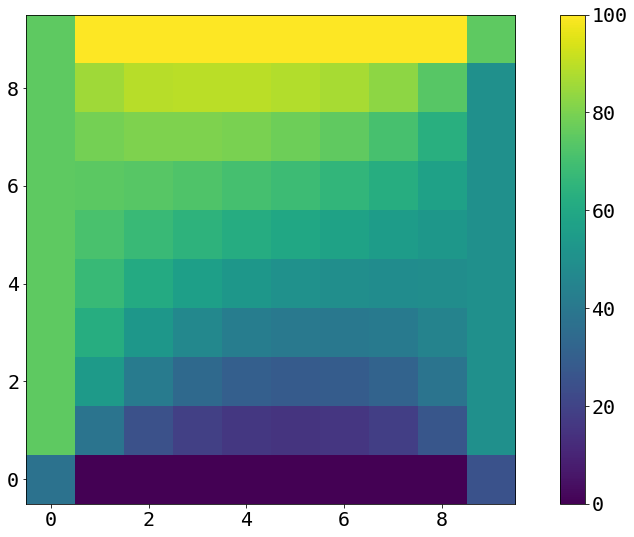

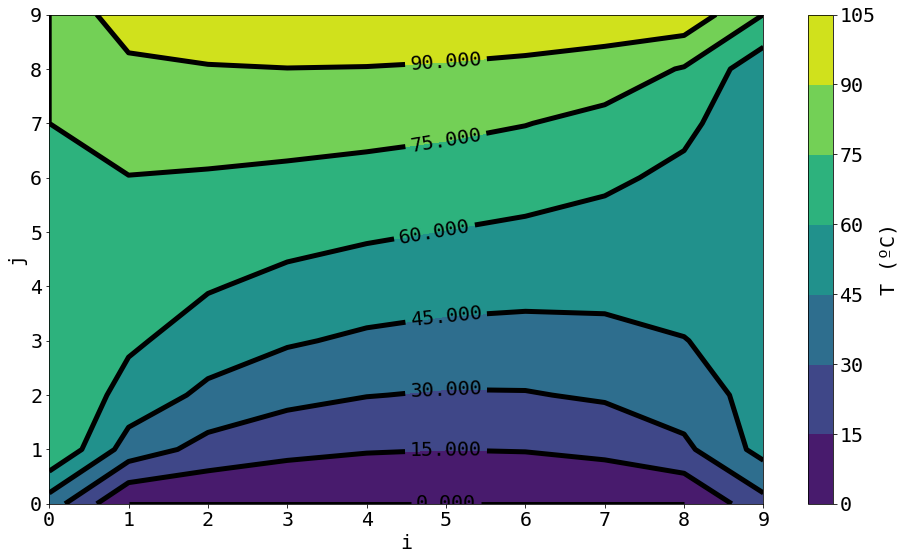

In [3]:
Nx = 10
Ny = 10


TC = {'A':75, 'B':0 , 'C':50, 'D':100}
cc_tipo = {'A':'temp','B':'temp','C':'temp','D':'temp'}

T = chapa(Nx, Ny, TC, cc_tipo)

T_plot = T.reshape((Nx,Ny)) 
s = plt.imshow(T_plot, origin= 'lower')
plt.colorbar(s)
fig, ax = plt.subplots()
mappable = ax.contourf(T_plot)
levels = ax.contour(T_plot, colors='k', linewidths=5)
cbar = plt.colorbar(mappable)
cbar.set_label('T (ºC)')
ax.clabel(levels, )
ax.set_xlabel('i')
ax.set_ylabel('j')


In [4]:
def performance(Nxs, Nys, TC, cc_tipo):
    N = len(Nxs)
    ts = np.zeros_like(Nxs).astype(float)
    
    for i in range(N):
        t0 = time.time()
        chapa(Nxs[i], Nys[i], TC, cc_tipo)
        t1 = time.time()
        ts[i] = t1-t0
#         print(ts)
    return ts 


Nxs = Nys = np.linspace(5,100, 20).astype(int)
TC = {'A':75, 'B':0 , 'C':50, 'D':100}
cc_tipo = {'A':'temp','B':'temp','C':'temp','D':'temp'}

ts = performance(Nxs, Nys, TC, cc_tipo)


Text(0, 0.5, 'Tiempo (s)')

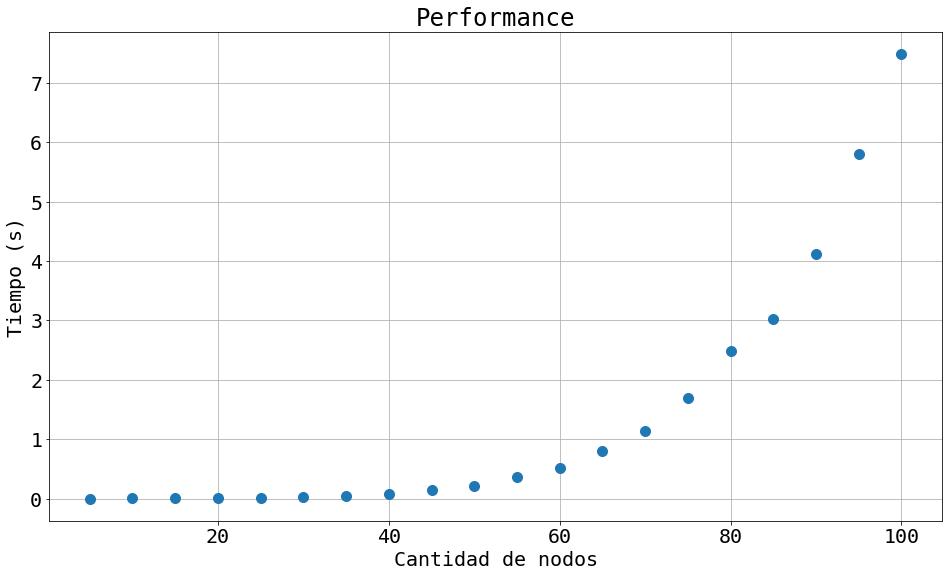

In [5]:
plt.plot(Nxs, ts, 'o', markersize= 10)
plt.grid()
plt.title('Performance')
plt.xlabel('Cantidad de nodos')
plt.ylabel('Tiempo (s)')